In [1]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython import display

In [2]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

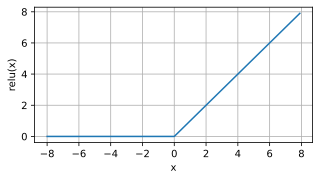

In [3]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
plot(x.numpy(), y.numpy(), 'x', 'relu(x)', figsize=(5, 2.5))

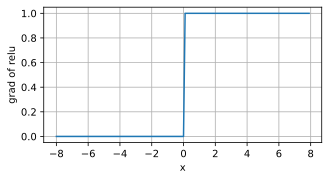

In [7]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of relu', figsize=(5, 2.5))

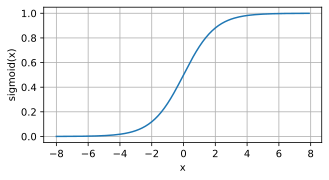

In [8]:
y = tf.nn.sigmoid(x)
plot(x.numpy(), y.numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

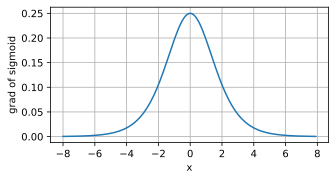

In [9]:
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of sigmoid', figsize=(5, 2.5))

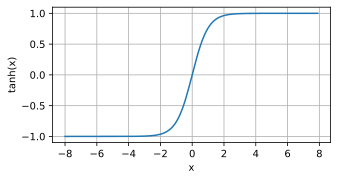

In [10]:
y = tf.nn.tanh(x)
plot(x.numpy(), y.numpy(), 'x', 'tanh(x)', figsize=(5, 2.5))

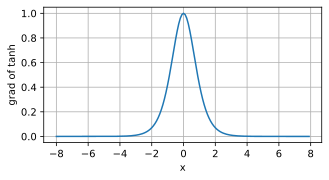

In [13]:
with tf.GradientTape() as t:
    y = tf.nn.tanh(x)
plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of tanh', figsize=(5, 2.5))